# Boston House prices

## GMIT Data Analytics 
### Machine Learning and Statistics 
#### Assignment 2019


![boston](img/Boston.jpg)


# research

[link](https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d)
[link eile](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

[more link](https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341)




## References

## Describe the Boston Housing Dataset

### The dataset

### background

<img src="img/house.png" alt="house" style="width: 500px;"/>

How does a potential home buyer know what's a fair price for their new home? What influences buying their ideal home and the price they are willing to pay to acquire it?. Typically there are features and services that add to, or reduce, the amount a potential buyer will pay for a property. Is there enough bedrooms? Can I commute to work from here? Is there a local school and is it decent? Identifying and quantifying measures such as these can give a better idea of the 'correct' price of a house. 

The Boston housing data set originated in a 1978 paper titled *'Hedonic prices and the demand for clean air'* in the journal **Environment, Economics & Management, vol.5**. The papers authors, Harrison and Rubinfeld discussed using census housing data to estimate the degree to which people will pay for anti pollution measures and how this can prove methodologically problematic. 

The **hedonic price method** is an economic pricing model that infers the price of an item (such as  housing) by looking at analogous data such as environmental features, goods or services (e.g location of property, shopping districts, access to quality schools, crime rates etc). 

Each surrogate feature comes with a cost or benefit that the market (e.g. people who buy houses) considers in assessing what a fair price is for the property. People pay more for a house close to a good school or in a nice low crime neigbourhood. A similar property in a more challenging area would be marketed at a lower price as the market would expect a discount to  compensation for poorer utility. ref(http://www.cbabuilder.co.uk/Quant5.html)

Harrison and Rubinfeld, 1978 found that small increases in air pollution damage are positively correlated with air pollution levels (as expected) and greater household income. That is more expensive houses were in marginally worse air quality areas. They found that the households willingness to pay for clean air was very sensitive to the factors used in the hedonic pricing model rather than depending on the price elasticity of the air quality demand equation. [ref](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf)

#### Aims

This project will perform an exploratory analysis of the Boston housing/house dataset. It will pull out the interesting relationships between price and some of the 13 other features collated. A descriptive statistical analysis will be used to find features that may prove interesting. Then an inferential statistical analysis will be performed looking at the relationship between price of a house and whether or not it is influenced by boardering Boston's Charles river. The project will then look at modeling an artificial neural network to see if any of the 13 features of the dataset are predictive of the price of the property. 

#### The Boston Housing Dataset
The data was downloaded from an archived page of UCI Machine Learning Repository [ref](https://archive.fo/5RkVv#selection-6.3-855.2). The data itself was taken from the US census in particular the Boston Standard Metropolitan Statistical Area (SMSA) census tracts from 1970 [ref the paper by h&r](). It is a record of hedonic housing data from various regions around Boston city. Each row contains data relating to a specific region of Boston. In sum there are fourteen measures (the columns) and 506 geographical regions sampled (the rows). [REF](https://webcache.googleusercontent.com/search?q=cache:8C4R8IZYvpgJ:https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset+&cd=3&hl=en&ct=clnk&gl=ie&client=firefox-b-d)

The dataset contained no null or missing values. The information contained in the dataset deals with hedonic measures of housing in the suburbs around Boston USA. The 14 fields are as follows. 

1. CRIM: This measures the per capita crime rate by town
2. ZN: This measures the proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: This measures the proportion of non-retail business acres per town
4. CHAS: This is the Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: This measures the nitric oxides concentration (parts per 10 million)
6. RM: This measures the average number of rooms per dwelling
7. AGE: This measures the proportion of owner-occupied units built prior to 1940
8. DIS: This measures the weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: This measures the full-value property-tax rate per \$10,000
11. PTRATIO: This measures the pupil-teacher ratio by town
12. B: This measures the 1000(Bk - 0.63)\^2 where Bk is the proportion of blacks by town (very racist!!)
13. LSTAT: This measures the \% lower status of the population
14. MEDV: Median value of owner-occupied homes in \$1000's

[ref](https://archive.fo/5RkVv#selection-6.3-855.2)


The data can be found at the above link but it is also included with the python package sklearn



### imports

The following python packages were used in analysing the dataset.

In [1]:
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import pandas as pd
import sys


#### Import the data

In [2]:
# using the data from machine learning repository 
# specify the column names
names =["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
# Read the csv and convert it to a a dataframe with  one white space as seperator 
df =  pd.read_csv('data/housing.data.csv',  sep='\s+', header = None, names = names, engine='python') # no headers
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [5]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.nunique()


CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Is there any missing values? 

In [7]:
if df.isnull().empty:
    print("Null values present")
else:   
    print("No missing values")

No missing values


lets see what the sklearn boston dataset looks like

In [8]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
boston_dataset.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

The dataset has five elements, data, target, feature_names, DESCR and filename


In [10]:
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The DESCR is a description of the dataset. 

In [11]:
print(boston_dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


Seems to be the full data

In [12]:
np.set_printoptions(threshold=sys.maxsize)# print the full data without the ... stuff
boston_dataset.data

array([[6.32000e-03, 1.80000e+01, 2.31000e+00, 0.00000e+00, 5.38000e-01,
        6.57500e+00, 6.52000e+01, 4.09000e+00, 1.00000e+00, 2.96000e+02,
        1.53000e+01, 3.96900e+02, 4.98000e+00],
       [2.73100e-02, 0.00000e+00, 7.07000e+00, 0.00000e+00, 4.69000e-01,
        6.42100e+00, 7.89000e+01, 4.96710e+00, 2.00000e+00, 2.42000e+02,
        1.78000e+01, 3.96900e+02, 9.14000e+00],
       [2.72900e-02, 0.00000e+00, 7.07000e+00, 0.00000e+00, 4.69000e-01,
        7.18500e+00, 6.11000e+01, 4.96710e+00, 2.00000e+00, 2.42000e+02,
        1.78000e+01, 3.92830e+02, 4.03000e+00],
       [3.23700e-02, 0.00000e+00, 2.18000e+00, 0.00000e+00, 4.58000e-01,
        6.99800e+00, 4.58000e+01, 6.06220e+00, 3.00000e+00, 2.22000e+02,
        1.87000e+01, 3.94630e+02, 2.94000e+00],
       [6.90500e-02, 0.00000e+00, 2.18000e+00, 0.00000e+00, 4.58000e-01,
        7.14700e+00, 5.42000e+01, 6.06220e+00, 3.00000e+00, 2.22000e+02,
        1.87000e+01, 3.96900e+02, 5.33000e+00],
       [2.98500e-02, 0.00000e+

Not the full data as only 13 fields. Lets look at the other attributes of boston_dataset

In [13]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

From comparison with the csv file - this appears to be the MEDV field. 

In [14]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

This is the field headings of the 13 features bar the MEDV price field. The full data is the array in the data attribute plus the array in the target attribute. The sklearn boston_dataset is stored as a numpy array so lets turn it into a pandas dataframe 

In [15]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

## only 13 headings!! MEDV Missing - read the DESCR



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Add the MEDV data to the dataframe

In [16]:
#MEDV is stored in target
boston_dataset.target
# Add target to the boston database
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Compare this dataset with the one imported from machine learning repo archive. 

In [17]:
#compare with the csv database
ne = (df != boston).any(1) # csv import is df and sklearn import is boston
ne

0      False
1      False
2      False
3       True
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14      True
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22      True
23      True
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
476    False
477    False
478    False
479    False
480     True
481     True
482    False
483    False
484    False
485     True
486    False
487     True
488    False
489    False
490     True
491     True
492    False
493    False
494    False
495    False
496    False
497    False
498     True
499    False
500     True
501     True
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

The data is not the same!! Find out where and why. 

In [18]:
df.where(df.values==boston.values).notna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,True,True,True


Seems to be different in one field only, the crime rates CRIM column. Lets look at some values to see what is going on.

In [19]:
# look at some of the false values in CRIM
print(df.iloc[3, 0])
print(boston.iloc[3,0])
print(df.iloc[14, 0])
print(boston.iloc[14,0])
print(df.iloc[21, 0])
print(boston.iloc[21,0])
print(df.iloc[22, 0])
print(boston.iloc[22, 0])
print(df.iloc[23, 0])
print(boston.iloc[23, 0])

0.032369999999999996
0.03237
0.6379600000000001
0.63796
0.8520399999999999
0.85204
1.2324700000000002
1.23247
0.9884299999999999
0.98843


 The differences between df and boston datafields seems to be rounding errors. Lets round df\["CRIM\] to 5 decimal places and check for differences with the boston dataframe. 

In [20]:
df["CRIM"]=df.round({"CRIM":5})
df
df.where(df.values==boston.values).notna()
ne = (df != boston).any(1)
ne
if ne.any:
    print("same databases")
else:
    print("different databases")

same databases


The two dataframes are now the same  - I will use the csv one for now but I might change to the boston one later.

### Look at the data


# descriptive statistics

for reference

1. CRIM: CRIME
2. ZN:  residential land zoned for lots over 25,000 sq.ft.
3. INDUS:  proportion of non-retail business acres per town
4. CHAS: This is the Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) ?? no idea what that is
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: This measures the average number of rooms per dwelling
7. AGE: This measures the proportion of owner-occupied units built prior to 1940
8. DIS: This measures the weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: This measures the full-value property-tax rate per \$10,000
11. PTRATIO: This measures the pupil-teacher ratio by town
12. B: This measures the 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (very racist!!)
13. LSTAT: This measures the \% lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000's


What would I expect this data to show? I would expect high crime to reduce house prices, high res zone to increase prices as big house area means more expensive houses but I suspect its more complicated than that. high industry I'd expect this to reduce house prices up to a point. If the area is very industriliseed then house prices might be lower (or higher as more workers want to live close to work) - Id expect a non linear correlation here. NOX - I'd expect high polution areas to reduce house prices. I'd expect more rooms to increase house prices. I'd expect older people to be  more represented as home owners. I'd expect distance to work to have a complex relationship. house prices close to work would be more expensive but as long as the commute was reasonable I'd suspect subarb housing to also be expensive. I'd expect that out of the commutter zone the prices would drop. Radical highways? Dont know what radical means in this context - I supect houses beside roads would be more expensive as nearer to work access but also there is a negative utility of living close to traffic so I suppose it depends. Tax, I'd expect higher property tax to be linked to higher house prices but I think its refering to high tax being a disentive to buying a house at a stated price.  PTratio I expect that better ptratio indicates better pupil learning and higher quailty schools so would be positively correlated with house prices. B - very racist to include this in 1978 but I suppose economists dont care what they measure. I suspect that the measure  was included to indcate areas with high african americans homeowners was negatively correlated to house prices, a legacy from jim crow laws!!. LSTAT - I would suspect that areas with lower income people would  have cheaper housing. MEDV this is the value to which the other columns are compared against for the hedonic model of pricing. 

To sum I expect postive correlation with medv and RM, AGE, DIS?, ZN, PTratio; negative correlation with CRIM, NOX, TAX, B, LSTAT and mixed for INDUS, DIS?, RAD  measures 
ignore the CHAS variable  - yikes just read the rest of the assignment - its the charles river data that is to be used to do the predicting




Recap on question. 
1. Describe: Create a git - done
2. make it available to clone - not done
3. create a jupyter notebook - done
4. use descriptive statistics and plots to describe the Boston House Prices dataset
Total marks 20%

okay lets look at descriptive stats and plots


Lets get a feel for the overall dataset.

In [21]:
df.shape

(506, 14)

This is the shape expected. There are 506 data rows corresponding to the census data from the 506 municipality regions across the 14 measures. There is no header data.

In [22]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


What does these figures represent? Look at the description again (use the boston descr field)

In [23]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The original dataset came from Harrison and Rubinfeld 21972. They analysed along 15 measures for their hedonic model. .  to The were looking for a causal relationship rather than an indirect correlational relationship. Their dependent variable was MV - the median value of owner occupied homes which is termed MEDV in this dataset. The data fiesl can be broadly broken down into four categories, structural, neighbourhood, accessibility and air pollution. One pollutions field used by them PART, is not in the boston housing data (why?).  


Lets go through the 14 columns. 



**Neigbourhood factors**
Harrison and Rubinfeld analysed 8 neighbourhood factors B, LSTAT, CRIM, ZN, INDUS, TAX, PTRATIO and CHAS.  

**CRIM**
The CRIM variable is actually taken from FBI figures from 1970 rather than the census ref- the original report. Crime rate is typically proportional to perception of danger hence it should show negative correlation when paired with house prices. The figures shown are the regions per capita crime rate.
**ZN**
ZN is the proportion of residential land zoned for plots greater than 25,000 square feet. This data did not come from the census but from the Metropolitan Area planning commission of 1972. Larger zoning areas limit the number of smaller dwellings that can be constructed. Hence, Harrison and Rubinfeld expected larger zoning areas to be positively correlated with house price. They also suggested a positive link with larger zoning areas in having greater community amenities such as out door sporting facilities. The figures in the table represent a proportion of areas with large zoning/total area, as the figures are over 1 I'm assuming that the figures are a percentage. (reminder - look this up to check) 
**INDUS**
The INDUS variable is also a proportion. It is the proportion of non retail business acres per town. These figures were taken from Vogt, Ivers adn Associates' Comprehensive land use inventory report by the department of commerce and development 1965. This variable serves as a way of representing the externalities associated with industrialised areas such as increased traffic, ugly buildings, noise levels. Harrison and Rubinsfeld expected this variable to negatively impact house prices. As the figures are over 1 I'm assuming it is a percentage denoting number of non retail business acres/total town acres by 100. 
**CHAS**
CHAS variable is a binary marker that denotes whether or not the property tracts boarders the Charles River. If the property does bound the river then it is recorded as a 1 otherwise 0. Harrison and Rubinsfeld termed this variable a Dummy Variable. It will be interesting to see if it is indeed a dummy variable or if some correlation existed between CHAS and property prices. This data came from the 1970 US Census Tract maps. 
**TAX**
TAX refers to the full value tax rate on the property per 10,000. This variable was used to measure local public services costs. This measure was corrected by replacing nominal tax rates with local assessment ratios to reflect the full tax rate value in each area. The coefficient here was expected to be negative. The data was taken from the 1970 Massachusetts Tax payers foundation.  This data does not look to be a proportion or percentage. 
**PTRATIO**
PTRATIO refers to the pupil teacher ratio per the town's school district. This is used as a measure of public sector benefits. Harrison and Rubinfeld noted an unclear link between school quailty and pupil teacher ratio but the suggested a low ratio should be indicative of the teachers attentiveness to each pupil. They expected the sign here to be negative. i.e low ratio produces higher prices. The data came from the Massachusetts Department of Eduction 1971-72.   and p

**Structural factors**
Harrison and Rubinfeld looked at two structural measures RM and AGE
**RM**
RM denotes the average rooms in the owners property. It is a means of assessing how spacious dwellings are. Harrison and Rubinfeld suggested a positive effect on house prices. The data appears to be a straightforward measure of the number of rooms. The data was taken from the 1970 census.  
**AGE**
AGE denotes the age of the house not the age of the owner. It represents the proportion of owned houses built before 1940. 
It's a proportion so and over 1 so Im assuming its number of houses built prior to 1940 over total number of houses by 100. Better structural quality would have a positive effect on house prices so Im assuming newer houses are better quality? debatable. H & R dont say. The data here came from the 1970 census.  
**B**
B represents the proportion of African American home owners in the area. Harrison and Rubinfeld suggested low to average black populations would depress house value. But that when population demand for housing was high prices would laso be high. Hence they suggested a parabolic relationship with house prices. This data came from the 1970 Ccensus. 
**LSTAT**
LSTAT refers to the proportion of the population that has been deemed lower status. Another politically incorrect measure. Low status was measured by 0.5 times the lack of any high school attendance and number of males employed as labourers.  The data is logarithmic as having lower status as measured, is more onerous if already in higher socioeconomic bracket than if in a lower socioeconomic bracket.  

**Air Pollution levels**
Harrison and Rubinfeld analysed 2 air pollution factors namely NOX and PART. For some reason? PART is not part of the boston housing data. 
**NOX**
NOX measures the concentration of nitrogen oxide. The unit used is the annual average concentration in parts per hundred million. The data was taken from Transportation and Air Shed SImulation Model (TASSIM)i.e simulated data. The other measure of pollution not used in this report was also taken by this method. 


**Accessibility**
Harrison and Rubinfeld analysed 2 measures of accessibility DIS and RAD.
**DIS**
DIS refers to the weighted distances from the property to 5 Boston area employment centres. Harrison and Rubinfeld noted that economic urban land rent slopes predicted higher rent prices when properties were closer to high regions of employment. This data is recorded in logarithmic form and was taken from A. Schnare's 1973 phd dissertation An empirical analysis of the dimensions of neighbourhood quality. Harrison and Rubinfeld expected this to be a negative log relationship. 
**RAD**
RAD denotes an index of accessibility to radial highways. A radial highway is one that directly connects to an urban area, in this case, Boston. The reason this measure was included was that access to quality roads prevents negative pollution measures swamping employment opportunities benefits gained by owning properties within commuting distances to work. ,   good  an arterial highway leading to or from an urban center. Harrison and Rubinfeld expected this to be a positive log relationship. The data came from MIT's Boston Project. 

finally the dependent variable MEDV or MV as in the original report
**MEDV**
MEDV is the target dependent variable investigated. It is the median value of owner occupied homes and is taken from the 1970 census. It is measured in $thousands. 


Lets see if the relationship expected by Harrison and Rubinfeld holds by comparing MEDV as y value to each of the factors as x values. 


some descriptive plots


In [31]:
df.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


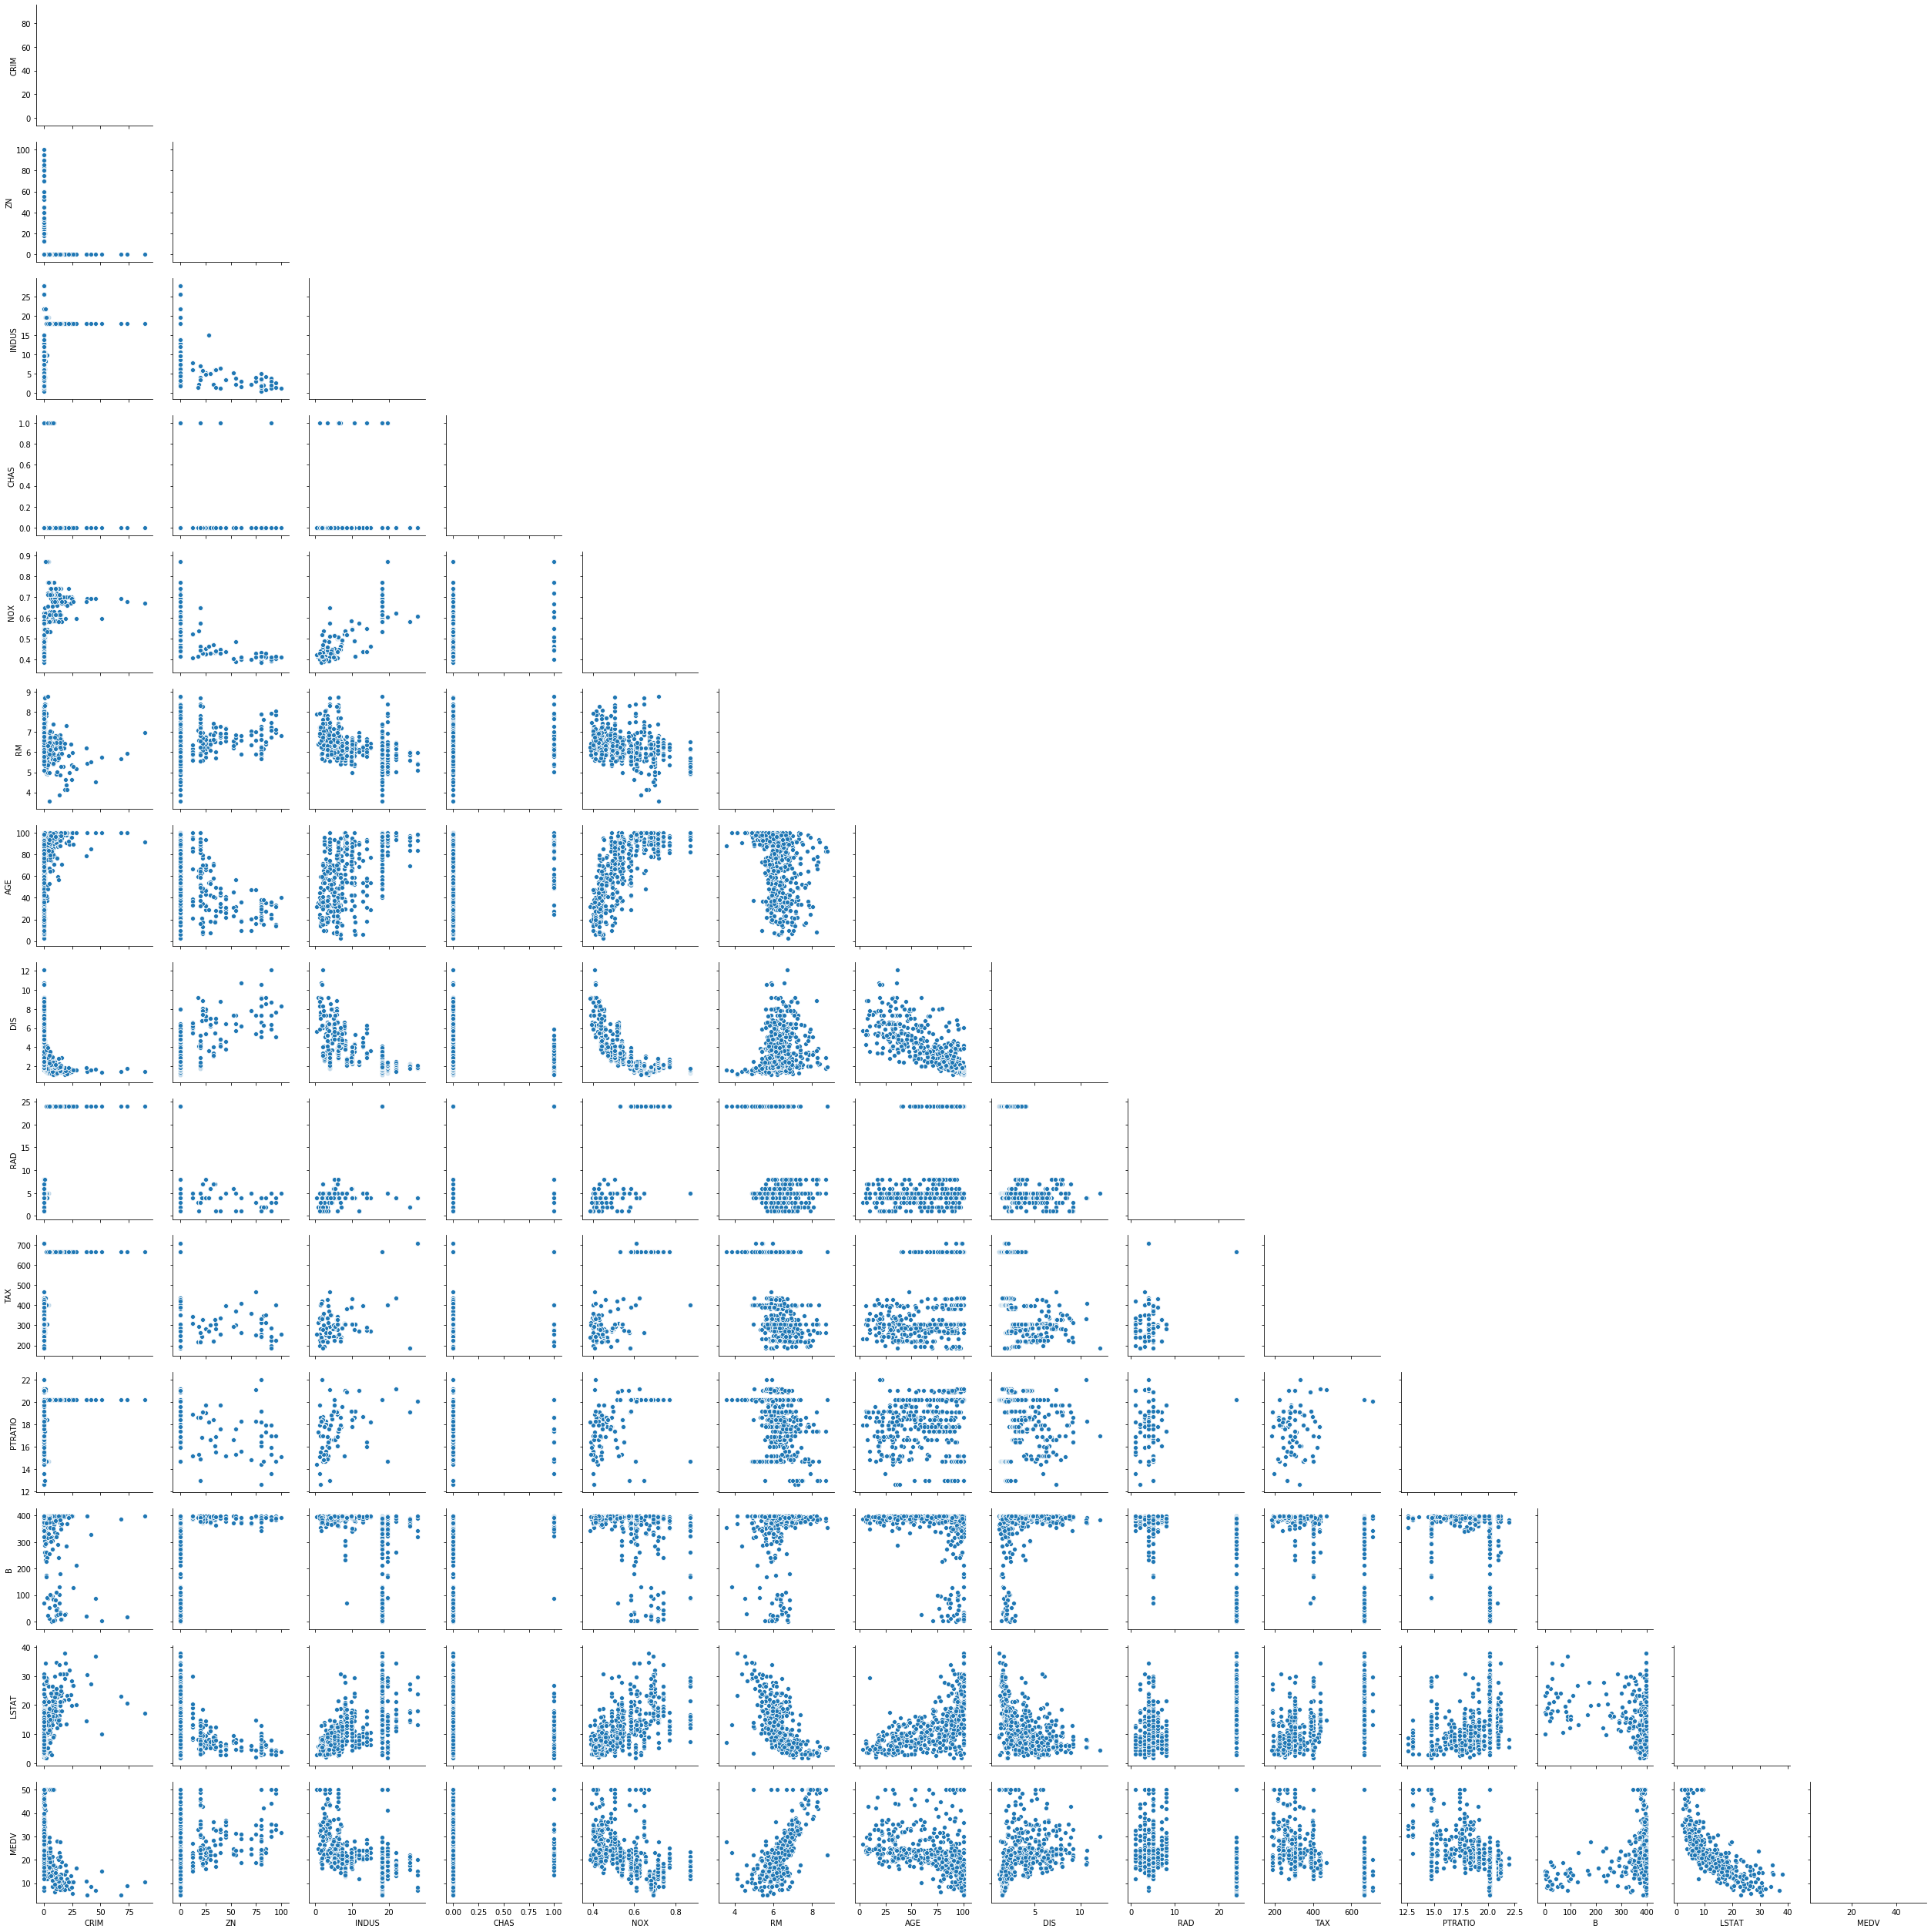

In [24]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

g = sns.pairplot(df)
g.map_upper(hide_current_axis)
g.map_diag(hide_current_axis)
# taken from  https://stackoverflow.com/questions/34087126/plot-lower-triangle-in-a-seaborn-pairgrid

too hard to see what is going on

In [25]:
target =pd.DataFrame(df['MEDV'])
#target.head()
features = df.drop(["MEDV"], axis =1)
features.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [26]:
#g = sns.pairplot(df, vars=names) # same as before - I only want one row

CRIM looks to produce a negative effect on house prices. ZH looks to be random or bimodal, INDUS looks to be in two clusters but maybe negatively linked?, Chas is definetly in two clusters as expected.. NOX looks to be random or a possible week negative relationship with lots of outliers.. RM looks to produce a strong positive effect on house prices. Age looks odd, clustered in the bottom but more randomly scattered in the top, maybe negatively linked? DIS also looks to be clustered at the bottom but in the oppoiste direction - again the pattern is not clear.RAD and TAX show similar clustering, maybe bimodal but in each case the left cluster does no show an obvious pattern. The right cluster looks vertical suggesting something odd with the data here.. to be random. DIS looks to be random RAD looks to be random PTRATIO looks to be somewhat random but it also looks a bit negative. B looks to be positively linked and lstat looks to be strongly negatively linked in a curve.

The variables of interest are CRIM, RM, B and LSTAT and maybe PTRATIO. maybe if time look at age and dis as well.

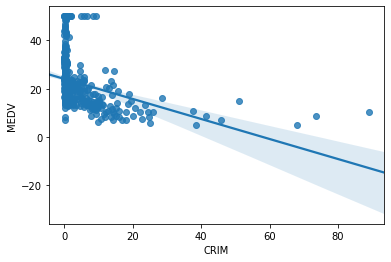

In [27]:
sns.regplot(df['CRIM'],df['MEDV']) # we want to predict house prices MEDV so keep that as the y value

The line above is almost vertical i.e. a consistent low level of crime however for values below circa 30,000 crime rates appear to be higher. There are many outliers in particular for values around 10k or less crime rates are particularly bad deviating from the low crime region. However there is also a spike of crime for properties with high value at exactly 50k. The spike at 50K does not look natural. It may be a default value for properties 50k or over. What does the data look like without those values? 



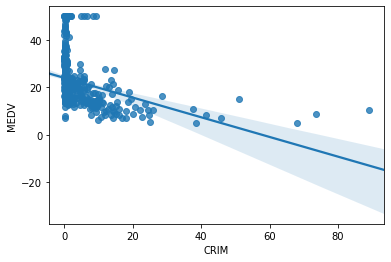

In [28]:
#df = df[df.MEDV != 50] # https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
# take that out for  now but maybe put it back in later
df.describe()
sns.regplot(df['CRIM'],df['MEDV']) 

That looks better. Crime rate typically is low regardless of house price but rising crime rates as a decreasing effect median house price. Particulary when the crime rate rises to 20 units there is a sharp drop in house prices. Crime ratesfor the most part do not get much higher than 20 though there are a good few outliers indicating some really rough neighbourhoods.
do the pairplots with the adjusted data now and see what the situation looks like.

In [29]:
#g = sns.pairplot(df, vars=names) # put it back later - takes a long time to run


## Visualise the data
### Scatter plots
lets plot MEDV as the y variable against each of the other features and see what patterns emerge.

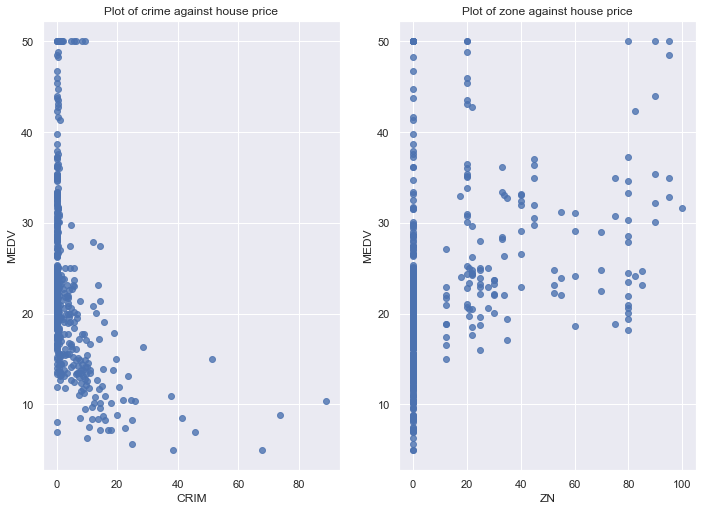

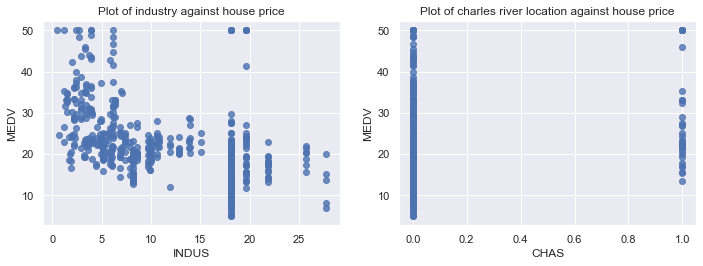

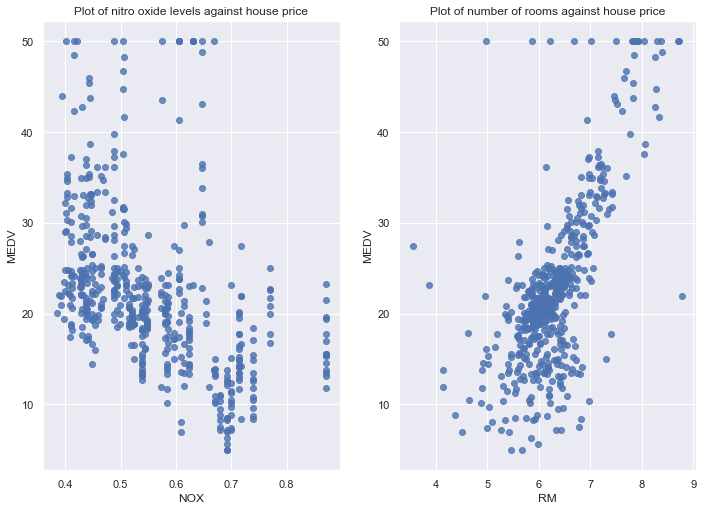

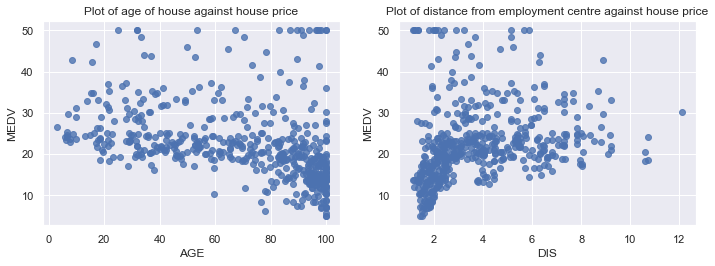

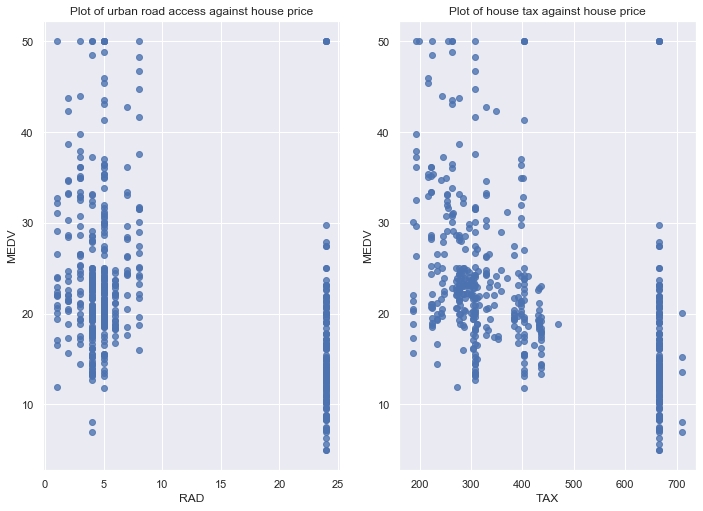

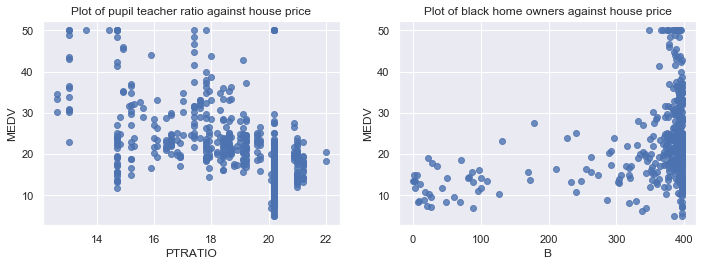

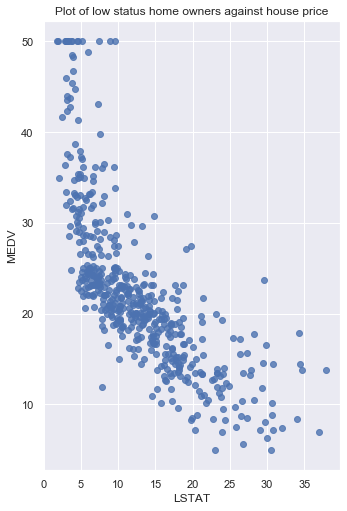

In [67]:
# print out the plots on the last line only, I'm only interested in medv as the y and the features as the x
plt.subplot(121)
plt.title("Plot of crime against house price")
sns.regplot(df['CRIM'],df['MEDV'],fit_reg = False)
plt.subplot(122)
plt.title("Plot of zone against house price")
sns.regplot(df['ZN'],df['MEDV'],fit_reg = False)
plt.show()
plt.subplot(221)
plt.title("Plot of industry against house price")
sns.regplot(df['INDUS'],df['MEDV'],fit_reg = False)
plt.subplot(222)
plt.title("Plot of charles river location against house price")
sns.regplot(df['CHAS'],df['MEDV'],fit_reg = False)
plt.show()
plt.subplot(121)
plt.title("Plot of nitro oxide levels against house price")
sns.regplot(df['NOX'],df['MEDV'],fit_reg = False)
plt.subplot(122)
plt.title("Plot of number of rooms against house price")
sns.regplot(df['RM'],df['MEDV'],fit_reg = False)
plt.show()
plt.subplot(221)
plt.title("Plot of age of house against house price")
sns.regplot(df['AGE'],df['MEDV'],fit_reg = False)
plt.subplot(222)
plt.title("Plot of distance from employment centre against house price")
sns.regplot(df['DIS'],df['MEDV'],fit_reg = False)
plt.show()
plt.subplot(121)
plt.title("Plot of urban road access against house price")
sns.regplot(df['RAD'],df['MEDV'],fit_reg = False)
plt.subplot(122)
plt.title("Plot of house tax against house price")
sns.regplot(df['TAX'],df['MEDV'],fit_reg = False)
plt.show()
plt.subplot(221)
plt.title("Plot of pupil teacher ratio against house price")
sns.regplot(df['PTRATIO'],df['MEDV'],fit_reg = False)
plt.subplot(222)
plt.title("Plot of black home owners against house price")
sns.regplot(df['B'],df['MEDV'],fit_reg = False)
plt.show()
plt.subplot(121)
plt.title("Plot of low status home owners against house price")
sns.regplot(df['LSTAT'],df['MEDV'],fit_reg = False)
plt.show()


which of the above looks like further investigations needed? **CRIM** looks to have a negative impact on house price but the relationship does not look linear - maybe parabolic. **RM** looks to be a strong positive effect on house price. It also looks linear. **PTRATIO** looks to be negatively linked but the effect is not strong or clear. **B** looks to be postively related but data very clustered on one end. **LSTAT** looks to be a strong negative effect, possibly linear but it could be parabolic. 




In [79]:
# what are they called ?
names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

lets plot again but with the regression line fitted

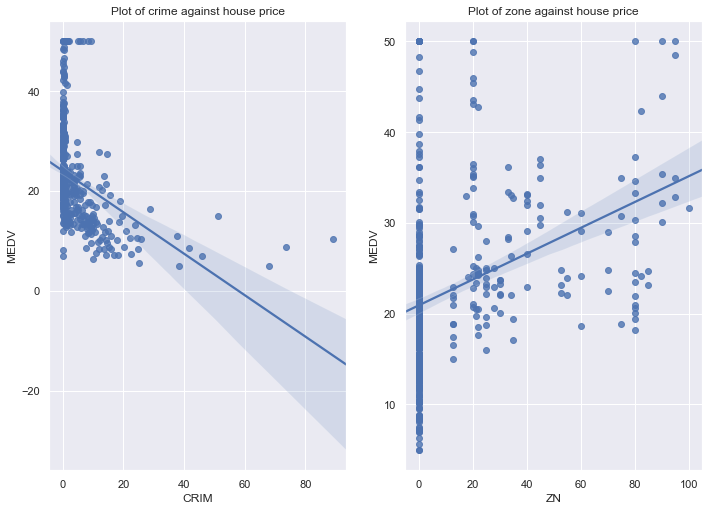

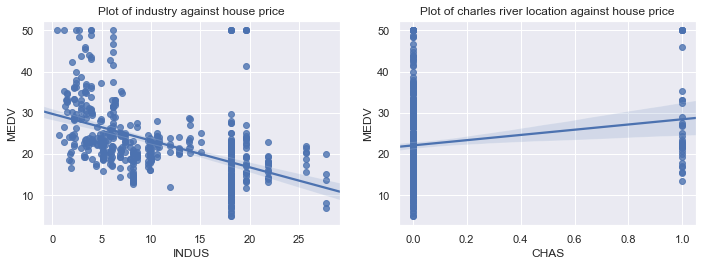

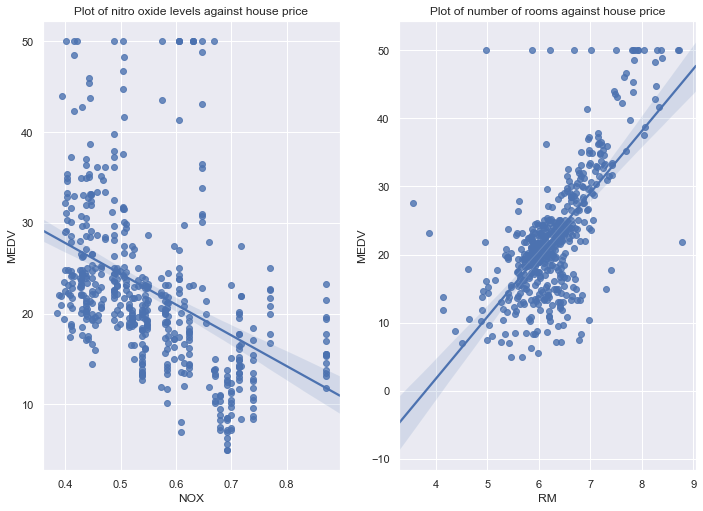

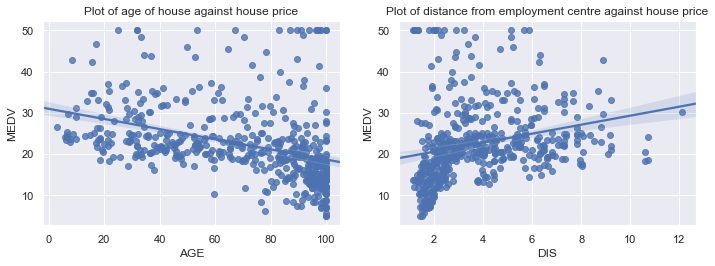

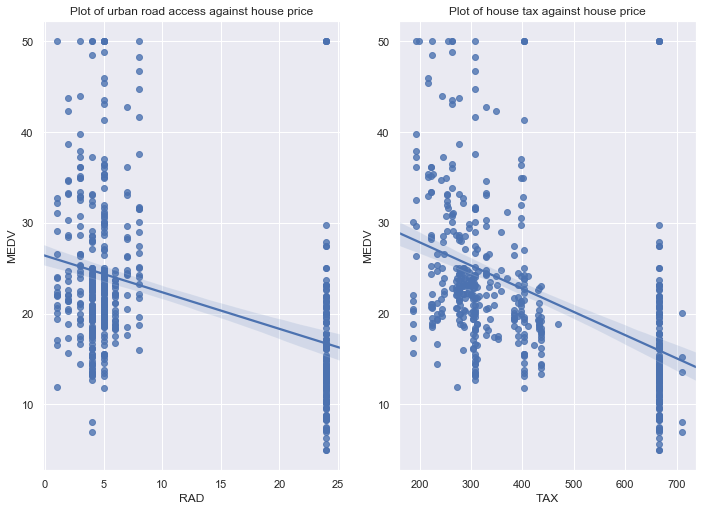

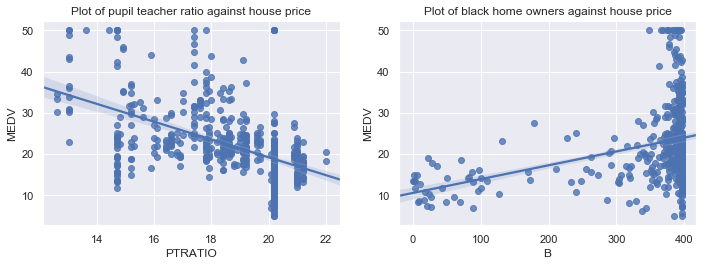

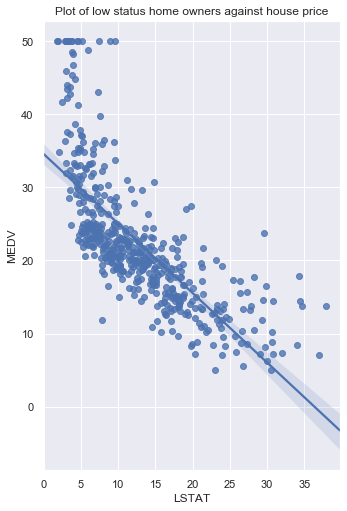

In [66]:
# print out the plots on the last line only, I'm only interested in medv as the y and the features as the x
plt.subplot(121)
plt.title("Plot of crime against house price")
sns.regplot(df['CRIM'],df['MEDV'],fit_reg = True)
plt.subplot(122)
plt.title("Plot of zone against house price")
sns.regplot(df['ZN'],df['MEDV'],fit_reg = True)
plt.show()
plt.subplot(221)
plt.title("Plot of industry against house price")
sns.regplot(df['INDUS'],df['MEDV'],fit_reg = True)
plt.subplot(222)
plt.title("Plot of charles river location against house price")
sns.regplot(df['CHAS'],df['MEDV'],fit_reg = True)
plt.show()
plt.subplot(121)
plt.title("Plot of nitro oxide levels against house price")
sns.regplot(df['NOX'],df['MEDV'],fit_reg = True)
plt.subplot(122)
plt.title("Plot of number of rooms against house price")
sns.regplot(df['RM'],df['MEDV'],fit_reg = True)
plt.show()
plt.subplot(221)
plt.title("Plot of age of house against house price")
sns.regplot(df['AGE'],df['MEDV'],fit_reg = True)
plt.subplot(222)
plt.title("Plot of distance from employment centre against house price")
sns.regplot(df['DIS'],df['MEDV'],fit_reg = True)
plt.show()
plt.subplot(121)
plt.title("Plot of urban road access against house price")
sns.regplot(df['RAD'],df['MEDV'],fit_reg = True)
plt.subplot(122)
plt.title("Plot of house tax against house price")
sns.regplot(df['TAX'],df['MEDV'],fit_reg = True)
plt.show()
plt.subplot(221)
plt.title("Plot of pupil teacher ratio against house price")
sns.regplot(df['PTRATIO'],df['MEDV'],fit_reg = True)
plt.subplot(222)
plt.title("Plot of black home owners against house price")
sns.regplot(df['B'],df['MEDV'],fit_reg = True)
plt.show()
plt.subplot(121)
plt.title("Plot of low status home owners against house price")
sns.regplot(df['LSTAT'],df['MEDV'],fit_reg = True)
plt.show()


lets look at some of the distributions by plotting histograms
### histograms

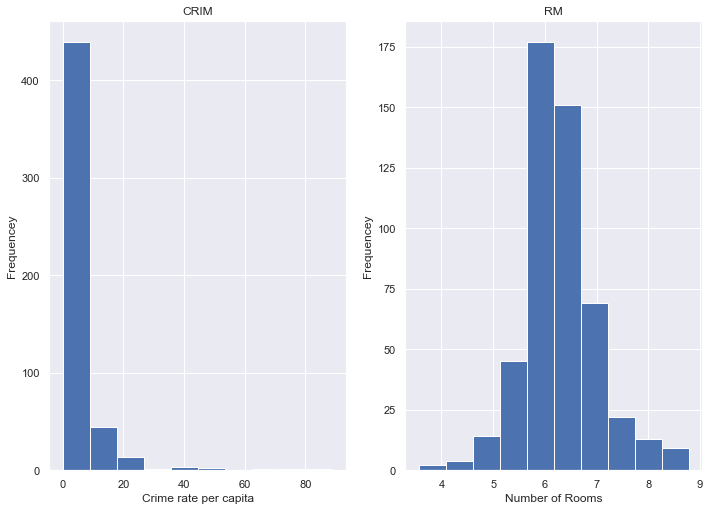

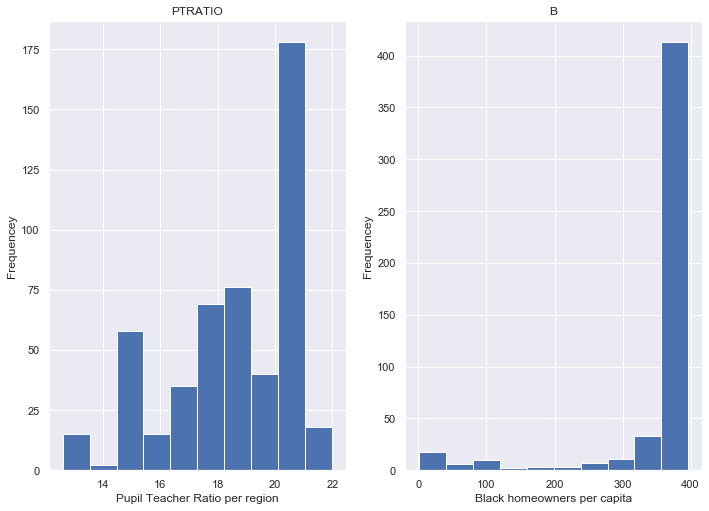

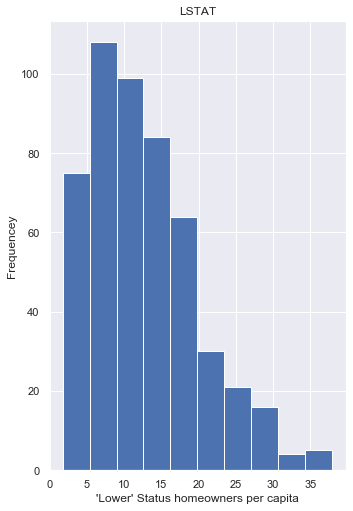

In [83]:
plt.subplot(121)
plt.hist(df.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.subplot(122)
plt.hist(df.RM)
plt.title("RM")
plt.xlabel("Number of Rooms")
plt.ylabel("Frequencey")
plt.show()
plt.subplot(121)
plt.hist(df.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil Teacher Ratio per region")
plt.ylabel("Frequencey")
plt.subplot(122)
plt.hist(df.B)
plt.title("B")
plt.xlabel("Black homeowners per capita")
plt.ylabel("Frequencey")
plt.show()
plt.subplot(121)
plt.hist(df.LSTAT)
plt.title("LSTAT")
plt.xlabel("'Lower' Status homeowners per capita")
plt.ylabel("Frequencey")
plt.show()

and the rest of the dataset' histograms

In [80]:
names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

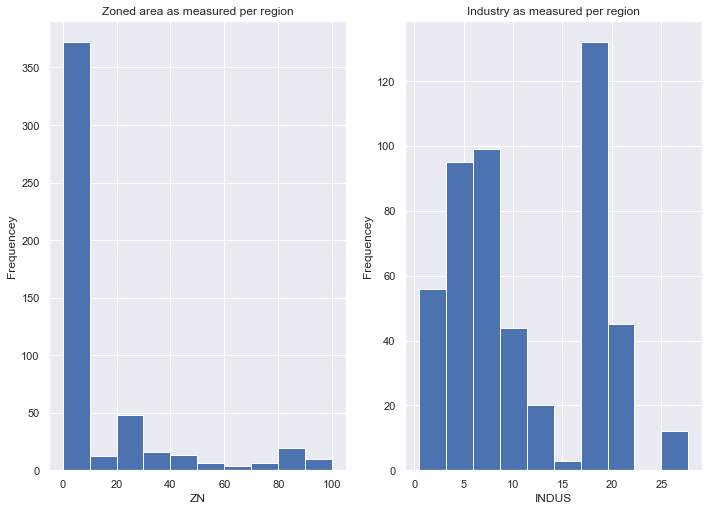

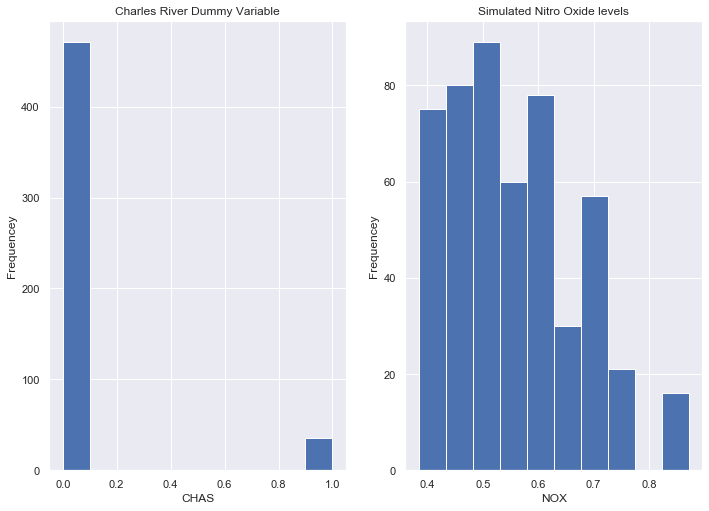

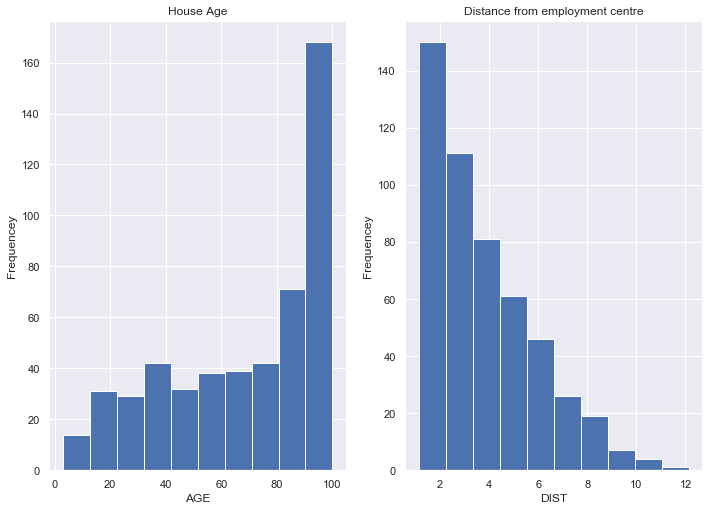

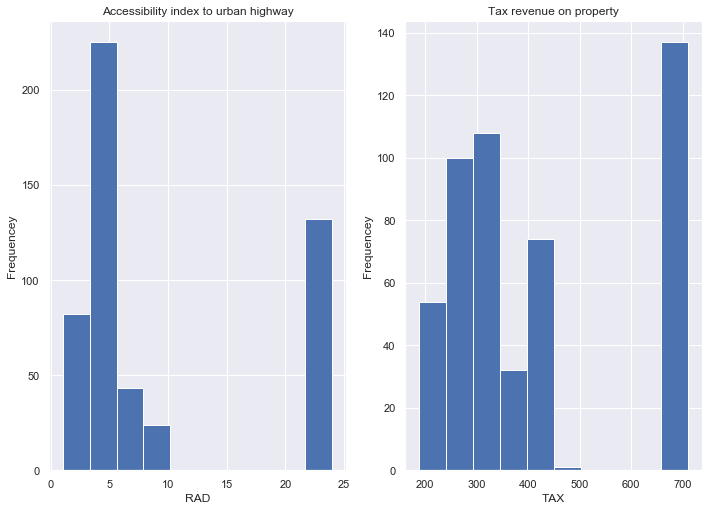

In [86]:
plt.subplot(121)
plt.hist(df.ZN)
plt.title("Zoned area as measured per region")
plt.xlabel("ZN")
plt.ylabel("Frequencey")
plt.subplot(122)
plt.hist(df.INDUS)
plt.title("Industry as measured per region")
plt.xlabel("INDUS")
plt.ylabel("Frequencey")
plt.show()
plt.subplot(121)
plt.hist(df.CHAS)
plt.title("Charles River Dummy Variable")
plt.xlabel("CHAS")
plt.ylabel("Frequencey")
plt.subplot(122)
plt.hist(df.NOX)
plt.title("Simulated Nitro Oxide levels")
plt.xlabel("NOX")
plt.ylabel("Frequencey")
plt.show()
plt.subplot(121)
plt.hist(df.AGE)
plt.title("House Age")
plt.xlabel("AGE")
plt.ylabel("Frequencey")
plt.subplot(122)
plt.hist(df.DIS)
plt.title("Distance from employment centre")
plt.xlabel("DIST")
plt.ylabel("Frequencey")
plt.show()
plt.subplot(121)
plt.hist(df.RAD)
plt.title("Accessibility index to urban highway")
plt.xlabel("RAD")
plt.ylabel("Frequencey")
plt.subplot(122)
plt.hist(df.TAX)
plt.title("Tax revenue on property")
plt.xlabel("TAX")
plt.ylabel("Frequencey")
plt.show()

### REDO ThIS SECTIOn!!

Only RM looks normally distributed. CRIM, PTRATIO and LSTAT are all skewed right And B is left skewed or possbilay bi modal. LSTAT looks to be gamma or chi squared or maybe log normal but mostly chi squared by visuals anyways. There is a sharp drop with CRIM, PTRATIO and B suggesting log normal or exponential # 

describe the other data here...



## go over ptratio as I made a mistake

Lets look at some box plots.

### Boxplots

lets plot some boxplots of the five possible indicators of price.




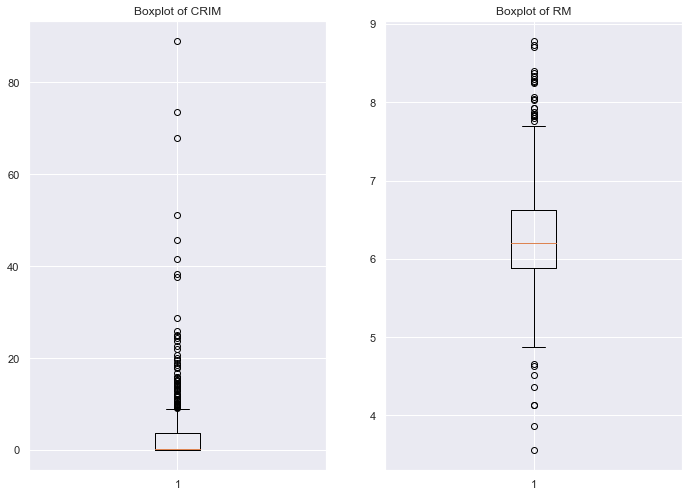

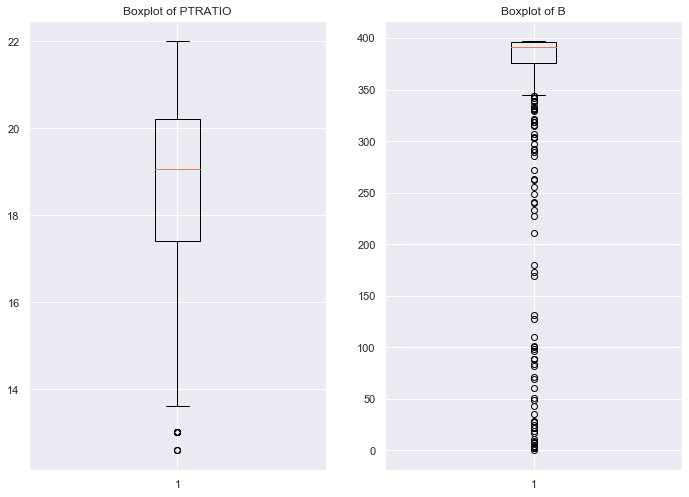

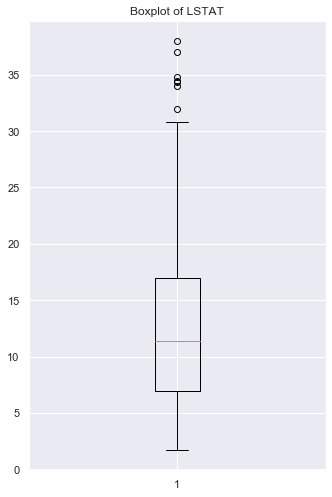

In [78]:
plt.subplot(121)
plt.title('Boxplot of CRIM')
plt.boxplot(df.CRIM)
plt.subplot(122)
plt.title('Boxplot of RM')
plt.boxplot(df.RM)
plt.show()
plt.subplot(121)
plt.title('Boxplot of PTRATIO')
plt.boxplot(df.PTRATIO)
plt.subplot(122)
plt.title('Boxplot of B')
plt.boxplot(df.B)
plt.show()
plt.subplot(121)
plt.title('Boxplot of LSTAT')
plt.boxplot(df.LSTAT)
plt.show()


This shows a good deal of outliers with crime rates at the upper end and with black homeowners on the lower end. There are upper and lower outliers with the number of rooms per house and a few lower outliers with pupil teacher ratio and aa few upper outliers with lower status home owners. I'll keep them in for now but maybe look an an analysis with possible outliers minimised particulary in cases where there is only a few outliers as with the many outliers with the crime suggests that there is a good deal of variability and i think this should be kept.  



## I might add descriptions for all the data - maybe do it!! only inferential stats are asked for with the charles river variable and I haven't done any description of that. 



Lets add some boxplots for the rest of the data

In [88]:
for n in names:
  print(n)

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
MEDV


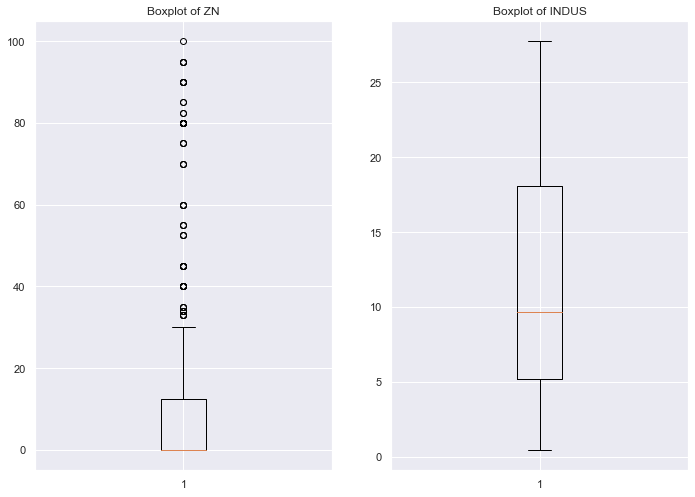

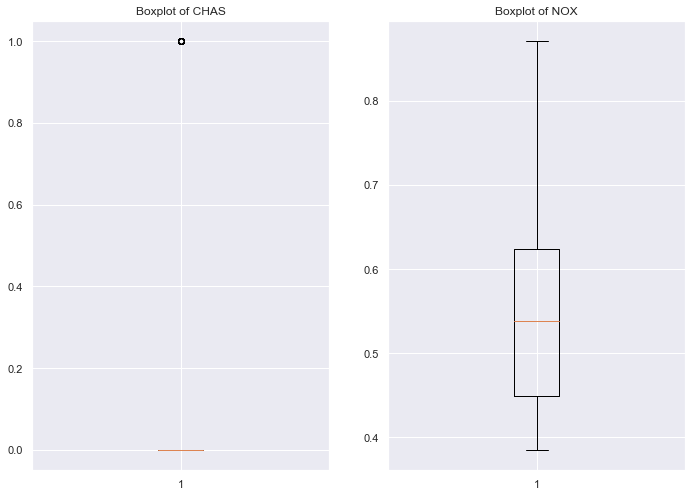

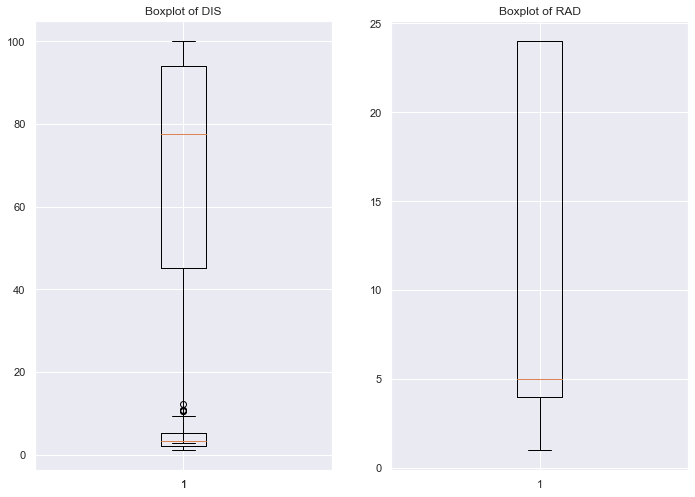

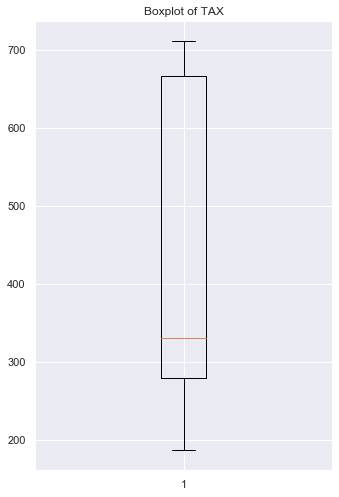

In [91]:
plt.subplot(121)
plt.title('Boxplot of ZN')
plt.boxplot(df.ZN)
plt.subplot(122)
plt.title('Boxplot of INDUS')
plt.boxplot(df.INDUS)
plt.show()
plt.subplot(121)
plt.title('Boxplot of CHAS')
plt.boxplot(df.CHAS)
plt.subplot(122)
plt.title('Boxplot of NOX')
plt.boxplot(df.NOX)
plt.show()
plt.subplot(121)
plt.title('Boxplot of AGE')
plt.boxplot(df.AGE)
plt.title('Boxplot of DIS')
plt.boxplot(df.DIS)
plt.subplot(122)
plt.title('Boxplot of RAD')
plt.boxplot(df.RAD)
plt.show()
plt.subplot(121)
plt.title('Boxplot of TAX')
plt.boxplot(df.TAX)
plt.show()


comment on the findings above

## Infer 
use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren't. Explain and discuss. 

The charles river variable was added by Harrison and ? as a dummy variable. It is 1 if the property boarders boston's charles river and 0 otherwise. from looking at the scatter plot we can see that more properties do not boarder the river as you would expect. There are also more varaiblity in house prices with properties taht dont boarder the river.


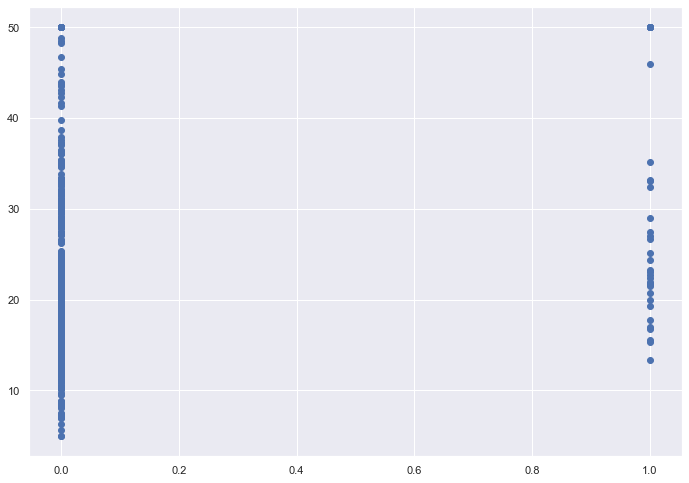

In [93]:
plt.scatter(df['CHAS'], df['MEDV'])

lets plot it with the regression line added

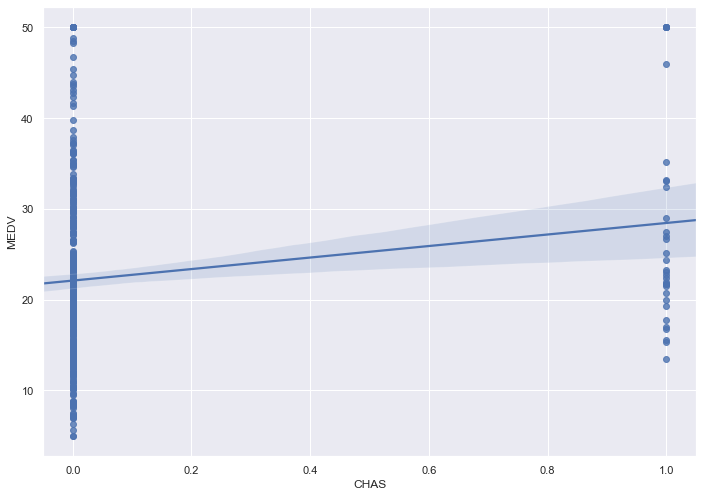

In [95]:
sns.regplot(df.CHAS, df.MEDV)

This draws a positve line between the dummy variable suggesting that prices are higher on properties boardering the river.
whats the line's equation? 


In [100]:
cl= np.polyfit(df['CHAS'], df['MEDV'], 1)
m=cl[0]
m
c = cl[1]
c

22.093842887473453

$$y = 6.35x + 22.10$$

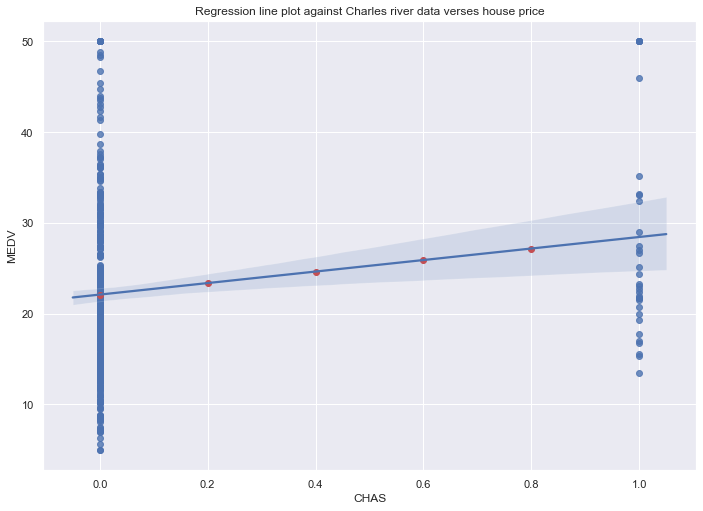

In [118]:
x=np.arange(0, 1, .2)
y=m*x+c
plt.title("Regression line plot against Charles river data verses house price")
sns.regplot(df.CHAS, df.MEDV)
plt.scatter(x,y , color='r', marker='o' )

However *can* linear regression be applied in this case? lets check the assumptions required for a linear regression analysis. 

HOS - continue here...

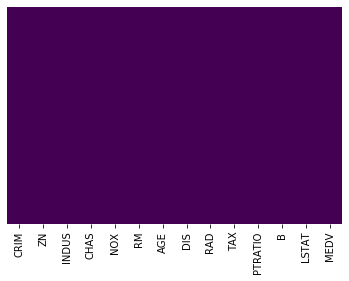

In [33]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis') # no missing values

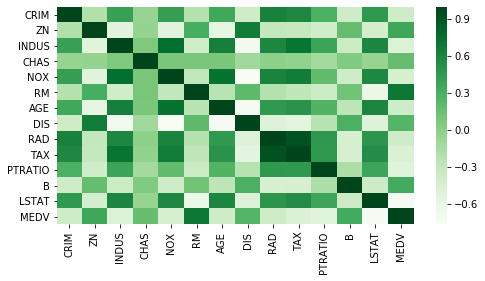

In [34]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap='Greens',annot=False)

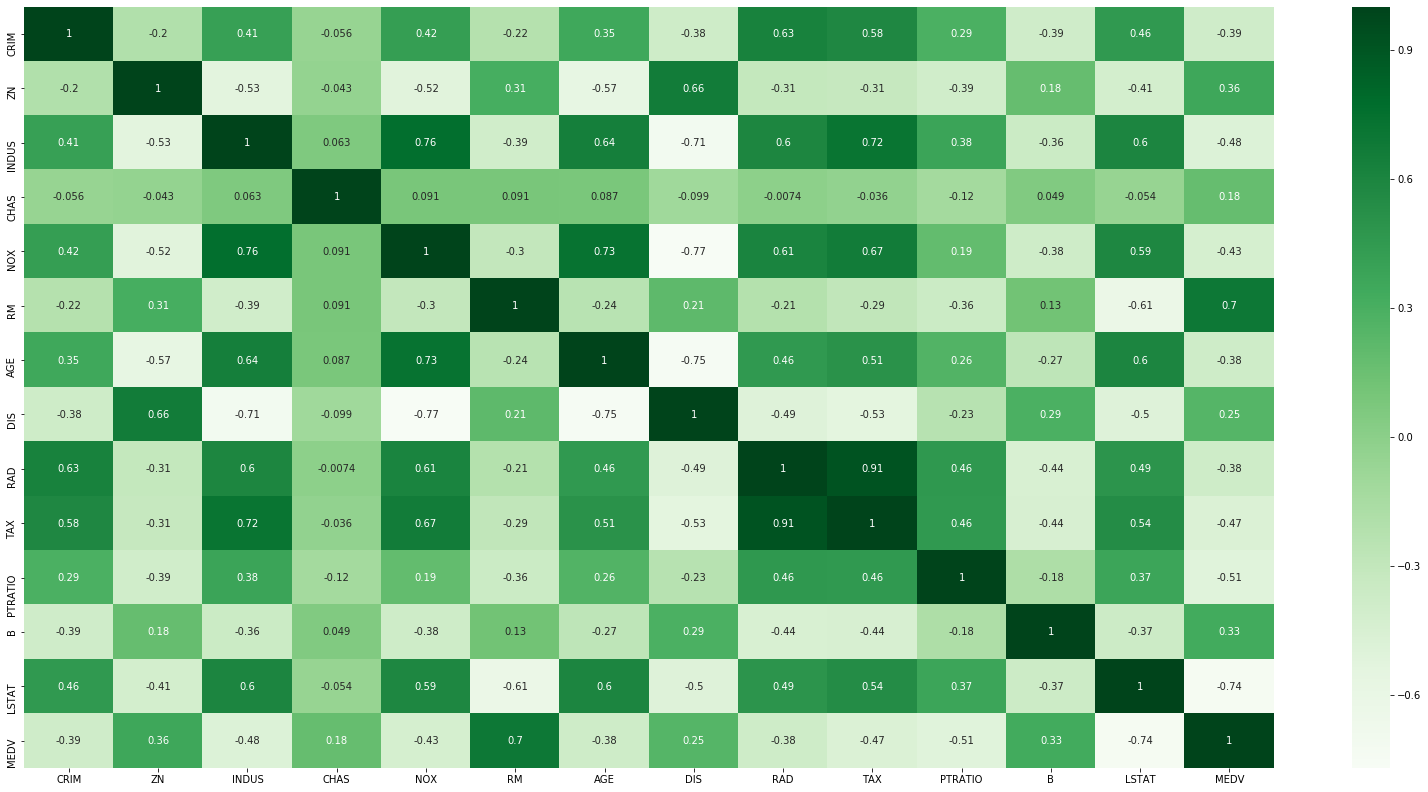

In [35]:
plt.figure(figsize=(28,14))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

areas that look likely to be strongly Corrolated
CRIM and LSTAT, PTRATIO, TAX RAD (strong) AGE, NOX, INDUS
ZN and MEDV, B, DIS (strong), RM, 
INDUS and LSTAT, PTRATIO, TAX (strong), RAD, AGE, NOX, CRIM,
CHAS and nothing much, maybe a bit with MEDV and B
NOX with LSTAT, PTRATIO, TAX, RAD, AGE, INDUS CRIM
RM with MEDV, B, DIS, ZN, 
AGE with LSTAT, PTRATIO, TAX, RAD, NOX, INDUS, CRIM
DIS with MEDV, B, RM, ZN, 
RAD with lSTAT, PTRATIO

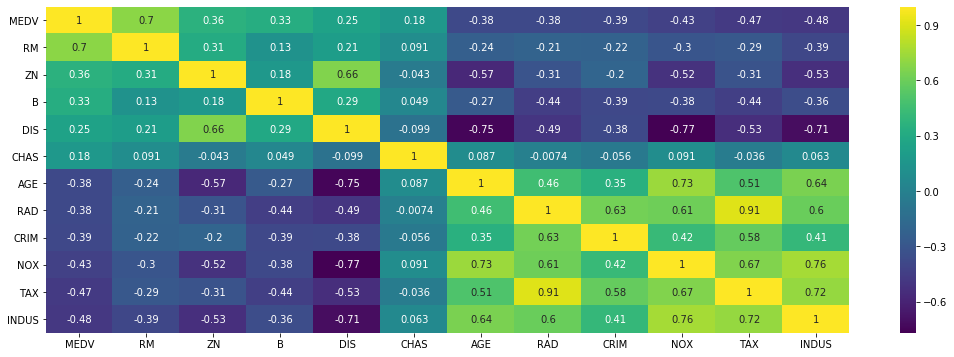

In [36]:
k = 12
cols = df.corr().nlargest(k, 'MEDV')['MEDV'].index
cm = df[cols].corr()
plt.figure(figsize=(18,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

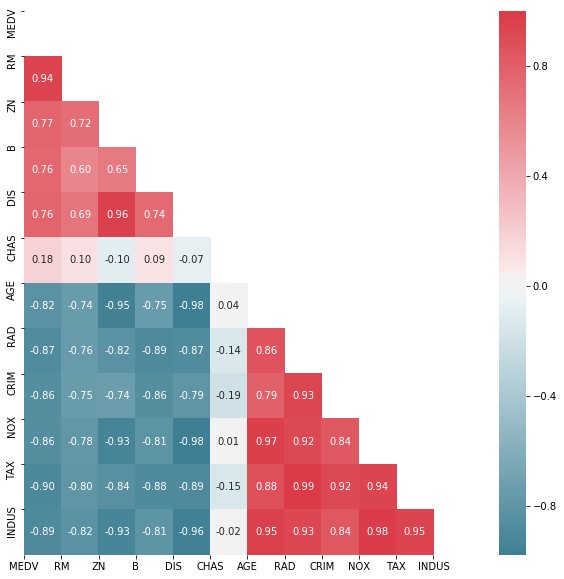

In [37]:

#https://ajh1143.github.io/Corr/
def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()
heatMap(cm,False)   

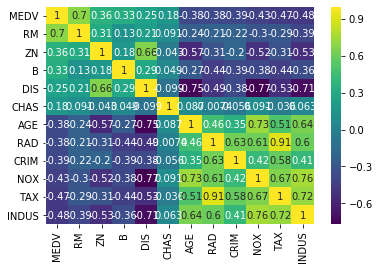

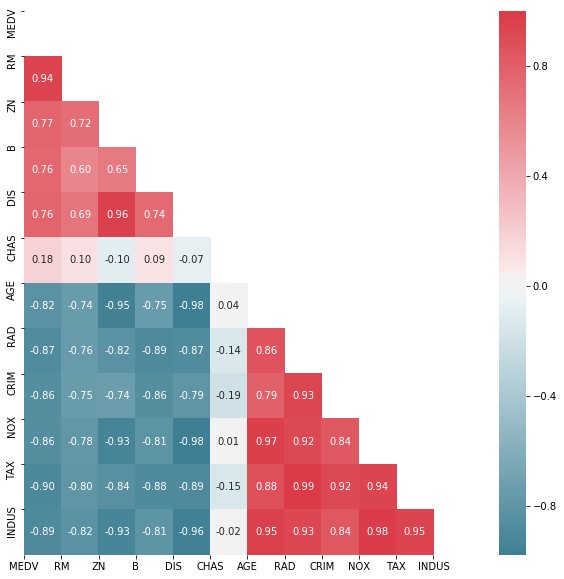

In [38]:
sns.heatmap(cm, annot=True,cmap = 'viridis')
heatMap(cm, False)

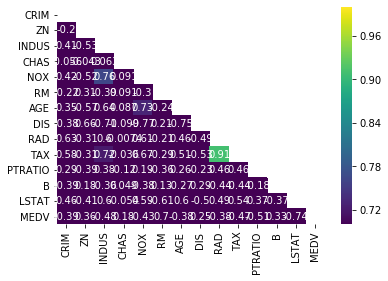

In [39]:
# adapted from https://stackoverflow.com/questions/36560829/seaborn-heatmap-with-frames
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,annot= True, mask = mask, vmin=0.7, cmap = 'viridis')

postive correlation areas over 0.7 to look at is is 
Tax and Rad, Tax and INDUS 
Age and NOX
Nox and Insus

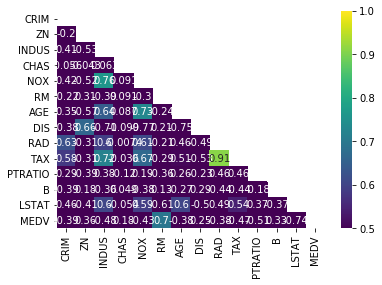

In [40]:
sns.heatmap(corr,annot= True, mask = mask, vmin=0.5, cmap = 'viridis')

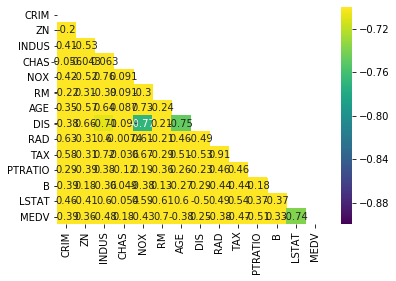

In [41]:
sns.heatmap(corr,annot= True, mask=mask, vmin=-0.7, vmax=-0.9, cmap = 'viridis')

negative correlation (over -0.7) areas  to look at is is 
Dis and Indus, NOx and Age
MEDV and Lstat

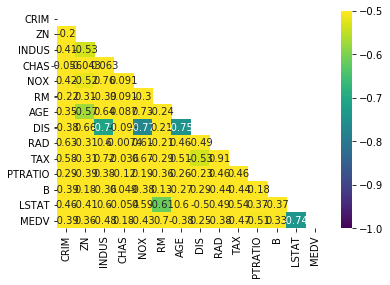

In [42]:
sns.heatmap(corr,annot= True, mask=mask, vmin=-0.5, vmax = -1, cmap = 'viridis')

Lets look at the price field first as that will be the one that's compared to all the other features.

In [43]:
df["MEDV"].describe()


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [44]:
df.CRIM.unique()
df.CRIM.value_counts()

14.33370    2
0.01501     2
0.08265     1
0.53700     1
1.35472     1
0.14103     1
0.03502     1
0.03615     1
0.66351     1
0.12650     1
0.10469     1
0.25356     1
0.10000     1
0.05515     1
0.11027     1
4.26131     1
0.34109     1
22.59710    1
0.28955     1
4.34879     1
0.10574     1
3.47428     1
0.02009     1
0.14866     1
5.66637     1
15.87440    1
0.04297     1
0.78570     1
0.29090     1
1.23247     1
           ..
0.05602     1
0.26838     1
0.02177     1
1.83377     1
15.86030    1
7.67202     1
51.13580    1
15.17720    1
8.05579     1
10.06230    1
41.52920    1
0.32264     1
0.04379     1
0.22212     1
0.13117     1
0.51183     1
6.28807     1
0.08826     1
24.80170    1
0.09065     1
23.64820    1
3.56868     1
12.80230    1
0.72580     1
0.03113     1
13.67810    1
0.88125     1
0.01951     1
0.49298     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x24ae38d3f28>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae38dc9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae38d38d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae38dc278>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae38dc908>],
 'means': []}

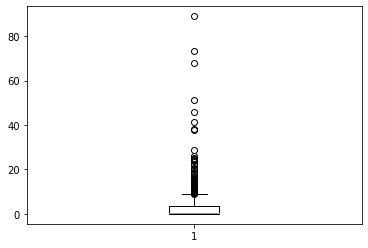

In [45]:
plt.boxplot(df['CRIM'])

Lots of upper end outliers present some quite close to the upper quartile and some substantially away from it. CRIM is crime so there appears to be higher levels of crime in some areas compared to other areas. There are no lower outliers and the level of crime is quite low for the most part with 6 areas being particularly bad for crime at over 40 mark and the a good few areas at the 10 to 30 mark. Crime areas have high level of crime and low crime areas have hardly any. 


continue here [ref ](https://www.datacamp.com/community/tutorials/demystifying-crucial-statistics-python)

In [46]:
df['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x24ae3797438>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae36d6048>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae37977b8>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae36d6c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae36d67b8>],
 'means': []}

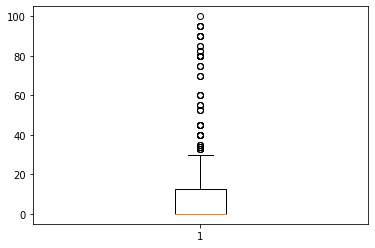

In [47]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['ZN'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae383e2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae4fe8c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae383e518>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae4fe8f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae34fc668>],
 'means': []}

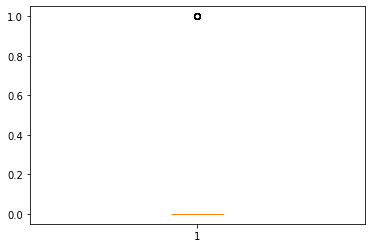

In [48]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['CHAS'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae37a2f98>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae37bb940>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae37a2e48>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae37bbfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae37bbf60>],
 'means': []}

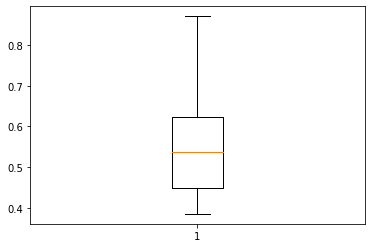

In [49]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['NOX'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae3c129e8>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae3c12e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae3c125f8>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae3c31780>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae3c31ac8>],
 'means': []}

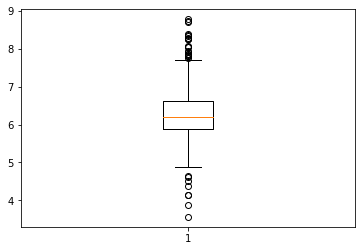

In [50]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['RM'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae3c92550>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae3c92c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae3c92160>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae3c92f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae414e668>],
 'means': []}

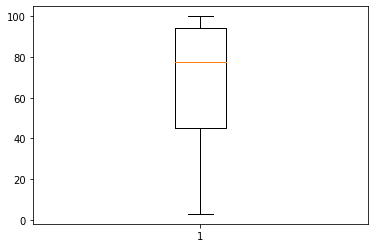

In [51]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['AGE'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae3809278>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae36c68d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae36e7da0>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae36c6f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae36c6ef0>],
 'means': []}

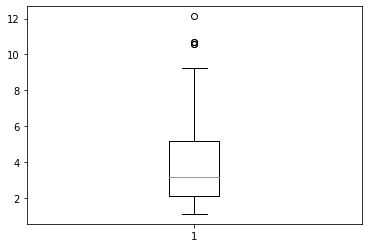

In [52]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['DIS'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae3d13d68>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae3d3e4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae3d13978>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae3d3eb38>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae3d3ee80>],
 'means': []}

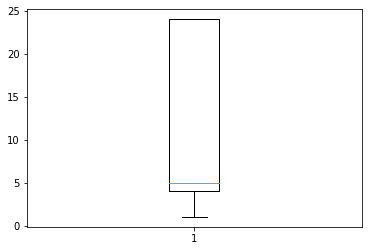

In [53]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['RAD'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae36259b0>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae3625e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae36255c0>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae360a748>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae360aa90>],
 'means': []}

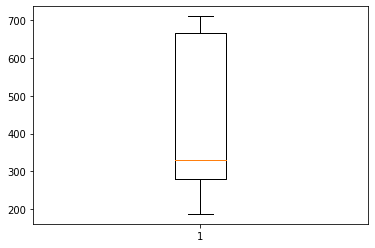

In [54]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['TAX'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae42376a0>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae4237d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae42372b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae422c438>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae422c780>],
 'means': []}

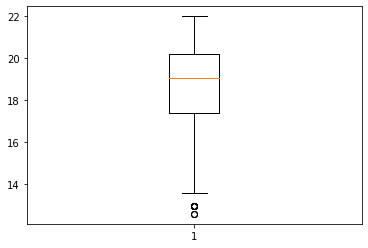

In [55]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['PTRATIO'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae4185dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae416f518>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae41859e8>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae416fba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae416fef0>],
 'means': []}

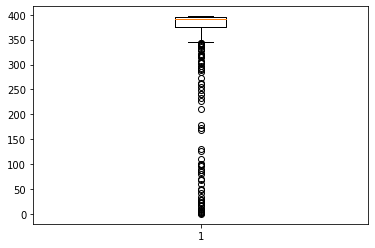

In [56]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['B'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae41bca58>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae41bcef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae41bc668>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae41b8828>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae41b8b70>],
 'means': []}

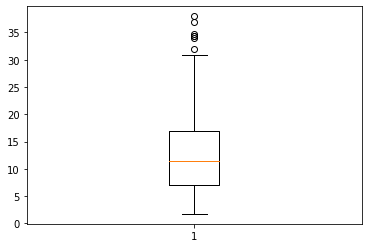

In [57]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['LSTAT'])


{'whiskers': [<matplotlib.lines.Line2D at 0x24ae3549e48>,
 'caps': [<matplotlib.lines.Line2D at 0x24ae36b1828>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ae3549cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x24ae36b1eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ae36b1f98>],
 'means': []}

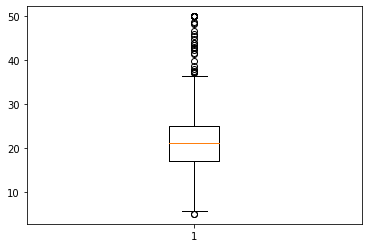

In [58]:
#CRIM 	ZN 	INDUS 	CHAS 	NOX 	RM 	AGE 	DIS 	RAD 	TAX 	PTRATIO 	B 	LSTAT 	MEDV
plt.boxplot(df['MEDV'])


## Infer

## predict

In [59]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [60]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

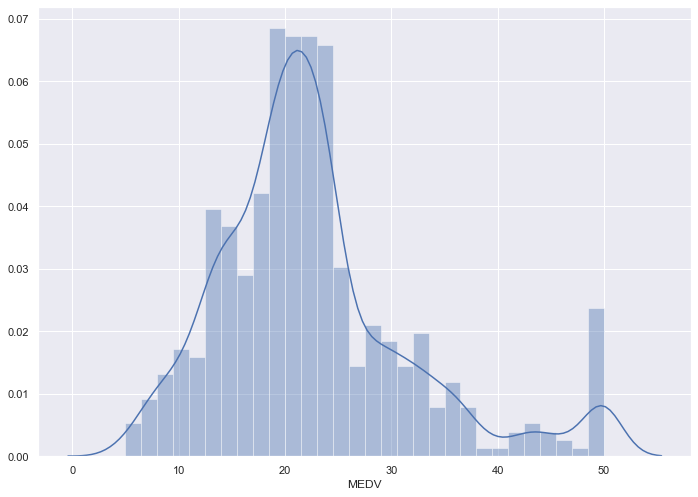

In [61]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

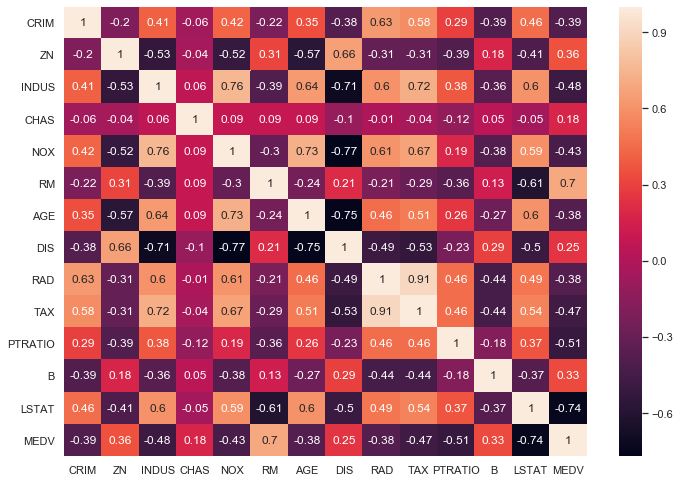

In [62]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

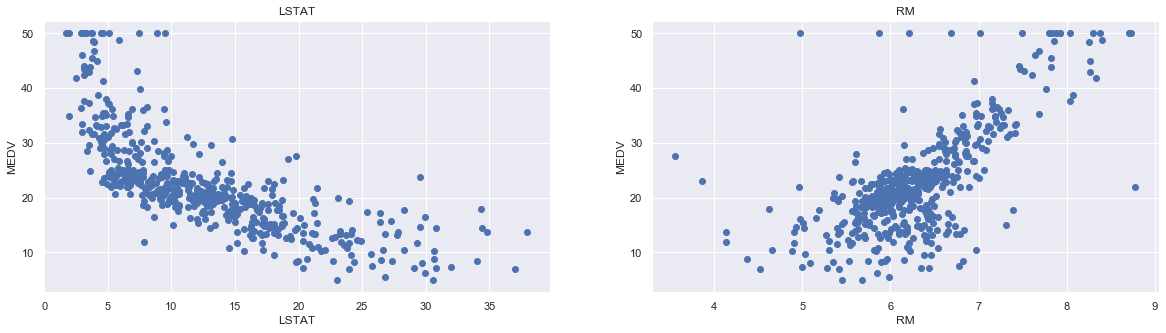

In [63]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')